<a href="https://colab.research.google.com/github/ucfilho/AI/blob/main/AI_2023/CV_stat_math/class_09_Automatic_Number_Plate_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INSTALLING ALL THE REQUIRED LIBRARIES**

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 45.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 9.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [ ]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# IMPORTING ALL THE REQUIRED LIBRARIES

In [ ]:
import cv2
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import imutils 
from google.colab.patches import cv2_imshow
import easyocr

# Reading the Image

In [ ]:
!gdown 17DeutH_Rzmw7J6Qdr9XdMFTRSH8v7VvY

Downloading...
From: https://drive.google.com/uc?id=17DeutH_Rzmw7J6Qdr9XdMFTRSH8v7VvY
To: /content/licence_plate.zip
100% 2.96M/2.96M [00:00<00:00, 233MB/s]


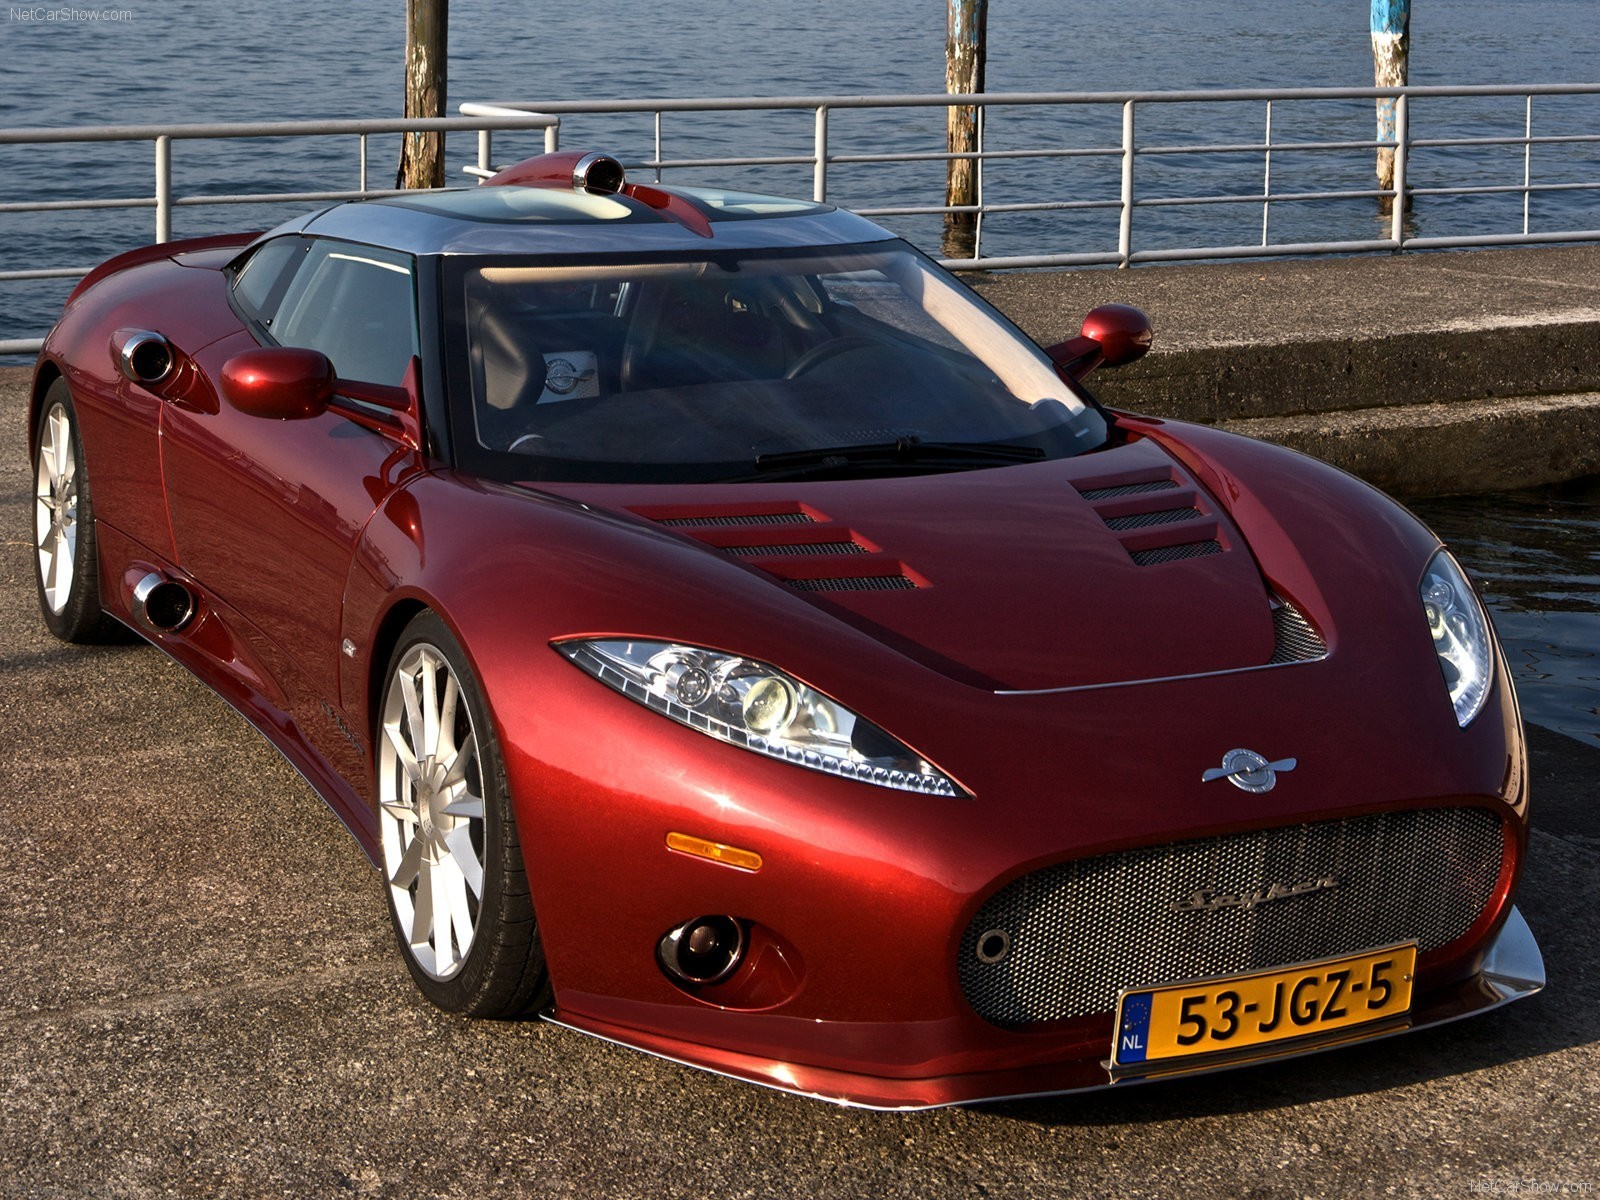

In [ ]:
FILE = 'licence_plate.zip'
archive = zipfile.ZipFile(FILE, 'r')
names = archive.namelist()
archive.extractall()
#source= 'carro3.jpg'
#source= 'placa_carro2.jpg'	
#source ='00011.jpg'
#source ='00024.jpg'
#source ='00029.jpg'
source = names[4]
img = cv2.imread(source)
cv2_imshow(img)

# Converting the Image into the GRAY Scale FORMAT

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
#plt.imshow(gray)

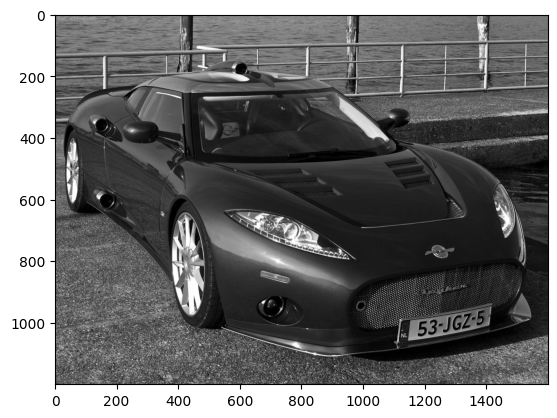

In [ ]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

# APPLYING FILTERING TO REMOVE THE NOISE FROM THE IMAGE, ALONG WITH THE EDGE DETECTION, WHICH ENABLES US TO FIND EDGES WITH IN THE IMAGE

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 11, 17)

In [ ]:
edged = cv2.Canny(bfilter, 30, 200)

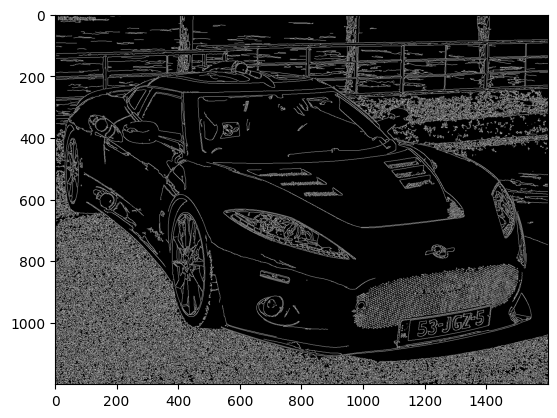

In [ ]:
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [ ]:
#  cv.CHAIN_APPROX_NONE gives (734 points) and  with cv.CHAIN_APPROX_SIMPLE (only 4 points)

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Simplifies how contonours are actually returned
contours = imutils.grab_contours(keypoints)

In [ ]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [ ]:
#print(contours)

In [ ]:
location = [None]

for contour in contours:
  # cv2.approxPolyDP returns a resampled contour, so this will still return a set of (x, y) points
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break

In [ ]:
print(location)

[[[1415  947]]

 [[1153  993]]

 [[1145 1057]]

 [[1406 1010]]]


In [ ]:
location = []
len(location)

0

In [ ]:
mask = np.zeros(gray.shape, np.uint8)

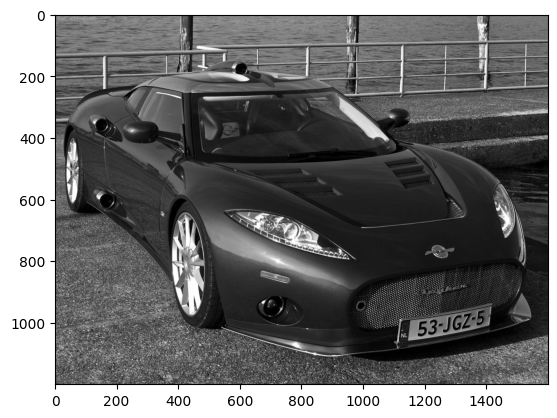

In [ ]:
if len(location) > 0:
  new_image = cv2.drawContours(mask, [location], 0, 255, -1)

  new_image = cv2.bitwise_and(img, img, mask = mask)
  (x, y) = np.where(mask == 255)

  (x1, y1) = (np.min(x), np.min(y))

  (x2, y2) = (np.max(x), np.max(y))

  cropped_image = gray[x1:x2+3, y1:y2+3]

else:
  new_image = gray
  cropped_image = gray


plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

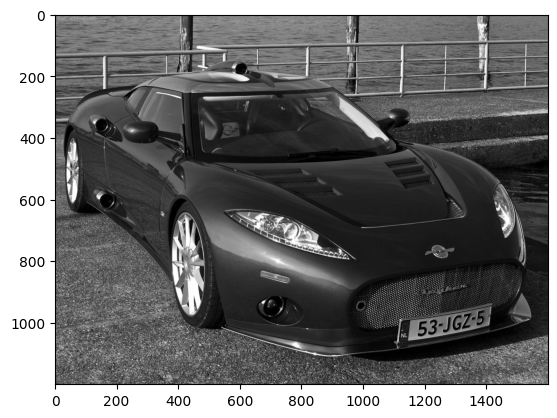

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [ ]:
reader = easyocr.Reader(['en'])

result = reader.readtext(cropped_image)



Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
print(result)

[([[9, 7], [135, 7], [135, 25], [9, 25]], 'NetCarShowcom', 0.8612767965185524), ([[1163.562398430198, 990.3435976452972], [1402.3035361580573, 952.7352856804997], [1410.437601569802, 1018.6564023547028], [1170.6964638419427, 1056.2647143195002]], '53JGZ-52', 0.17570962168715543)]


In [ ]:
#print(result[0][0])

In [ ]:
print(result[0][1])

NetCarShowcom


In [ ]:
#text = result[0][1]
licence_plate =""
for word in result:
  w = word[1]
  licence_plate += w + " "
text = licence_plate
font = cv2.FONT_HERSHEY_SIMPLEX

In [ ]:
print('licence plate:')
print(text)

licence plate:
NetCarShowcom 53JGZ-52 


In [ ]:
result

[([[9, 7], [135, 7], [135, 25], [9, 25]], 'NetCarShowcom', 0.8612767965185524),
 ([[1163.562398430198, 990.3435976452972],
   [1402.3035361580573, 952.7352856804997],
   [1410.437601569802, 1018.6564023547028],
   [1170.6964638419427, 1056.2647143195002]],
  '53JGZ-52',
  0.17570962168715543)]

In [ ]:
res = cv2.putText(img, text = text, org = (approx[0][0][0], approx[1][0][1]+60), fontFace = font, fontScale = 1, color = (0, 255, 0), thickness = 5)

In [ ]:
#res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255, 0), 3)

#plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))